# Time Series - LSTM Model

Link to the tutorial is [here](https://www.tutorialspoint.com/time_series/time_series_lstm_model.htm).

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

2023-06-19 23:46:36.390486: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 23:46:36.589349: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-19 23:46:36.589390: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-19 23:46:38.008335: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Define Data (Straight Line or Sine Wave)

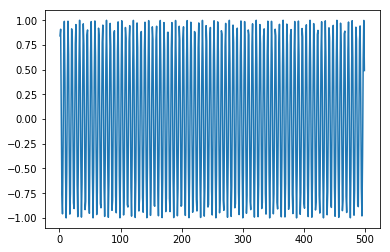

In [3]:
#data = 'line'
data= 'sine'
x = np.arange (1,500,1)
if data == 'line':
    y = 0.4 * x + 30
elif data == 'sine':
    y = np.sin(x)
else:
    y = x*0.0

plt.plot(x,y)

## Train/Test Split

In [4]:
trainx, testx = x[0:int(0.8*(len(x)))], x[int(0.8*(len(x))):]
trainy, testy = y[0:int(0.8*(len(y)))], y[int(0.8*(len(y))):]
train = np.array(list(zip(trainx,trainy)))
test = np.array(list(zip(trainx,trainy)))
#test = np.array(list(zip(testx,testy)))

## Define Dataset

In [5]:
def create_dataset(n_X, look_back):
   dataX, dataY = [], []
   for i in range(len(n_X)-look_back):
      a = n_X[i:(i+look_back), ]
      dataX.append(a)
      dataY.append(n_X[i + look_back, ])
   return np.array(dataX), np.array(dataY)

In [6]:
look_back = 1
trainx,trainy = create_dataset(train, look_back)
testx,testy = create_dataset(test, look_back)

In [7]:
trainx = np.reshape(trainx, (trainx.shape[0], 1, 2))
testx = np.reshape(testx, (testx.shape[0], 1, 2))

## Define Model

In [8]:
model = Sequential()
model.add(LSTM(256, return_sequences = True, input_shape = (trainx.shape[1], 2)))
model.add(LSTM(128,input_shape = (trainx.shape[1], 2)))
model.add(Dense(2))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

2023-06-19 23:46:40.827373: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-19 23:46:40.827427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (oslic7): /proc/driver/nvidia/version does not exist
2023-06-19 23:46:40.828547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train Model

In [9]:
model.fit(trainx, trainy, epochs = 2000, batch_size = 10, verbose = 2, shuffle = False)

Epoch 1/2000
40/40 - 4s - loss: 24905.1992 - 4s/epoch - 94ms/step
Epoch 2/2000
40/40 - 0s - loss: 23475.2090 - 190ms/epoch - 5ms/step
Epoch 3/2000
40/40 - 0s - loss: 22761.5723 - 192ms/epoch - 5ms/step
Epoch 4/2000
40/40 - 0s - loss: 22117.9590 - 192ms/epoch - 5ms/step
Epoch 5/2000
40/40 - 0s - loss: 21511.0332 - 190ms/epoch - 5ms/step
Epoch 6/2000
40/40 - 0s - loss: 20930.6348 - 184ms/epoch - 5ms/step
Epoch 7/2000
40/40 - 0s - loss: 20371.8008 - 179ms/epoch - 4ms/step
Epoch 8/2000
40/40 - 0s - loss: 19832.4199 - 189ms/epoch - 5ms/step
Epoch 9/2000
40/40 - 0s - loss: 19311.4375 - 176ms/epoch - 4ms/step
Epoch 10/2000
40/40 - 0s - loss: 18806.7285 - 175ms/epoch - 4ms/step
Epoch 11/2000
40/40 - 0s - loss: 18317.9707 - 181ms/epoch - 5ms/step
Epoch 12/2000
40/40 - 0s - loss: 17844.6074 - 204ms/epoch - 5ms/step
Epoch 13/2000
40/40 - 0s - loss: 17385.7168 - 203ms/epoch - 5ms/step
Epoch 14/2000
40/40 - 0s - loss: 16938.3477 - 193ms/epoch - 5ms/step
Epoch 15/2000
40/40 - 0s - loss: 16503.6172 -

Epoch 121/2000
40/40 - 0s - loss: 1122.8865 - 192ms/epoch - 5ms/step
Epoch 122/2000
40/40 - 0s - loss: 1095.9492 - 189ms/epoch - 5ms/step
Epoch 123/2000
40/40 - 0s - loss: 1060.5032 - 191ms/epoch - 5ms/step
Epoch 124/2000
40/40 - 0s - loss: 1036.4100 - 192ms/epoch - 5ms/step
Epoch 125/2000
40/40 - 0s - loss: 1002.4770 - 189ms/epoch - 5ms/step
Epoch 126/2000
40/40 - 0s - loss: 975.7280 - 193ms/epoch - 5ms/step
Epoch 127/2000
40/40 - 0s - loss: 946.1770 - 192ms/epoch - 5ms/step
Epoch 128/2000
40/40 - 0s - loss: 923.4909 - 191ms/epoch - 5ms/step
Epoch 129/2000
40/40 - 0s - loss: 894.1900 - 189ms/epoch - 5ms/step
Epoch 130/2000
40/40 - 0s - loss: 871.1552 - 187ms/epoch - 5ms/step
Epoch 131/2000
40/40 - 0s - loss: 844.5587 - 187ms/epoch - 5ms/step
Epoch 132/2000
40/40 - 0s - loss: 823.7887 - 187ms/epoch - 5ms/step
Epoch 133/2000
40/40 - 0s - loss: 798.6858 - 192ms/epoch - 5ms/step
Epoch 134/2000
40/40 - 0s - loss: 777.4882 - 195ms/epoch - 5ms/step
Epoch 135/2000
40/40 - 0s - loss: 755.6630 

Epoch 242/2000
40/40 - 0s - loss: 102.5043 - 198ms/epoch - 5ms/step
Epoch 243/2000
40/40 - 0s - loss: 68.8051 - 202ms/epoch - 5ms/step
Epoch 244/2000
40/40 - 0s - loss: 51.6827 - 199ms/epoch - 5ms/step
Epoch 245/2000
40/40 - 0s - loss: 118.7685 - 195ms/epoch - 5ms/step
Epoch 246/2000
40/40 - 0s - loss: 53.8453 - 196ms/epoch - 5ms/step
Epoch 247/2000
40/40 - 0s - loss: 47.3668 - 200ms/epoch - 5ms/step
Epoch 248/2000
40/40 - 0s - loss: 119.7875 - 205ms/epoch - 5ms/step
Epoch 249/2000
40/40 - 0s - loss: 56.5196 - 204ms/epoch - 5ms/step
Epoch 250/2000
40/40 - 0s - loss: 52.8294 - 201ms/epoch - 5ms/step
Epoch 251/2000
40/40 - 0s - loss: 99.5216 - 199ms/epoch - 5ms/step
Epoch 252/2000
40/40 - 0s - loss: 57.4391 - 205ms/epoch - 5ms/step
Epoch 253/2000
40/40 - 0s - loss: 41.2081 - 203ms/epoch - 5ms/step
Epoch 254/2000
40/40 - 0s - loss: 63.7919 - 193ms/epoch - 5ms/step
Epoch 255/2000
40/40 - 0s - loss: 72.9598 - 193ms/epoch - 5ms/step
Epoch 256/2000
40/40 - 0s - loss: 44.2528 - 192ms/epoch - 5

40/40 - 0s - loss: 29.5117 - 212ms/epoch - 5ms/step
Epoch 365/2000
40/40 - 0s - loss: 7.7885 - 207ms/epoch - 5ms/step
Epoch 366/2000
40/40 - 0s - loss: 15.8349 - 201ms/epoch - 5ms/step
Epoch 367/2000
40/40 - 0s - loss: 73.0495 - 201ms/epoch - 5ms/step
Epoch 368/2000
40/40 - 0s - loss: 52.0616 - 207ms/epoch - 5ms/step
Epoch 369/2000
40/40 - 0s - loss: 36.3235 - 207ms/epoch - 5ms/step
Epoch 370/2000
40/40 - 0s - loss: 35.9849 - 205ms/epoch - 5ms/step
Epoch 371/2000
40/40 - 0s - loss: 115.8887 - 205ms/epoch - 5ms/step
Epoch 372/2000
40/40 - 0s - loss: 67.2738 - 209ms/epoch - 5ms/step
Epoch 373/2000
40/40 - 0s - loss: 92.9678 - 200ms/epoch - 5ms/step
Epoch 374/2000
40/40 - 0s - loss: 26.5838 - 204ms/epoch - 5ms/step
Epoch 375/2000
40/40 - 0s - loss: 47.4552 - 206ms/epoch - 5ms/step
Epoch 376/2000
40/40 - 0s - loss: 103.1969 - 210ms/epoch - 5ms/step
Epoch 377/2000
40/40 - 0s - loss: 115.3416 - 212ms/epoch - 5ms/step
Epoch 378/2000
40/40 - 0s - loss: 51.2174 - 209ms/epoch - 5ms/step
Epoch 37

Epoch 487/2000
40/40 - 0s - loss: 21.9726 - 202ms/epoch - 5ms/step
Epoch 488/2000
40/40 - 0s - loss: 33.4712 - 195ms/epoch - 5ms/step
Epoch 489/2000
40/40 - 0s - loss: 65.9692 - 193ms/epoch - 5ms/step
Epoch 490/2000
40/40 - 0s - loss: 46.7223 - 194ms/epoch - 5ms/step
Epoch 491/2000
40/40 - 0s - loss: 50.0368 - 198ms/epoch - 5ms/step
Epoch 492/2000
40/40 - 0s - loss: 88.5455 - 200ms/epoch - 5ms/step
Epoch 493/2000
40/40 - 0s - loss: 128.9026 - 197ms/epoch - 5ms/step
Epoch 494/2000
40/40 - 0s - loss: 56.5118 - 195ms/epoch - 5ms/step
Epoch 495/2000
40/40 - 0s - loss: 102.7572 - 194ms/epoch - 5ms/step
Epoch 496/2000
40/40 - 0s - loss: 85.6400 - 194ms/epoch - 5ms/step
Epoch 497/2000
40/40 - 0s - loss: 71.4086 - 199ms/epoch - 5ms/step
Epoch 498/2000
40/40 - 0s - loss: 94.8135 - 195ms/epoch - 5ms/step
Epoch 499/2000
40/40 - 0s - loss: 52.0507 - 199ms/epoch - 5ms/step
Epoch 500/2000
40/40 - 0s - loss: 49.1463 - 195ms/epoch - 5ms/step
Epoch 501/2000
40/40 - 0s - loss: 66.9547 - 207ms/epoch - 5m

40/40 - 0s - loss: 89.6501 - 204ms/epoch - 5ms/step
Epoch 610/2000
40/40 - 0s - loss: 57.0373 - 198ms/epoch - 5ms/step
Epoch 611/2000
40/40 - 0s - loss: 68.1896 - 196ms/epoch - 5ms/step
Epoch 612/2000
40/40 - 0s - loss: 65.9424 - 199ms/epoch - 5ms/step
Epoch 613/2000
40/40 - 0s - loss: 57.5736 - 196ms/epoch - 5ms/step
Epoch 614/2000
40/40 - 0s - loss: 74.9671 - 193ms/epoch - 5ms/step
Epoch 615/2000
40/40 - 0s - loss: 53.0904 - 205ms/epoch - 5ms/step
Epoch 616/2000
40/40 - 0s - loss: 49.6180 - 204ms/epoch - 5ms/step
Epoch 617/2000
40/40 - 0s - loss: 58.5723 - 199ms/epoch - 5ms/step
Epoch 618/2000
40/40 - 0s - loss: 38.4406 - 198ms/epoch - 5ms/step
Epoch 619/2000
40/40 - 0s - loss: 76.6129 - 203ms/epoch - 5ms/step
Epoch 620/2000
40/40 - 0s - loss: 197.5398 - 199ms/epoch - 5ms/step
Epoch 621/2000
40/40 - 0s - loss: 53.1196 - 197ms/epoch - 5ms/step
Epoch 622/2000
40/40 - 0s - loss: 68.1951 - 196ms/epoch - 5ms/step
Epoch 623/2000
40/40 - 0s - loss: 82.2542 - 218ms/epoch - 5ms/step
Epoch 624

Epoch 732/2000
40/40 - 0s - loss: 36.2842 - 192ms/epoch - 5ms/step
Epoch 733/2000
40/40 - 0s - loss: 48.4514 - 191ms/epoch - 5ms/step
Epoch 734/2000
40/40 - 0s - loss: 58.4635 - 198ms/epoch - 5ms/step
Epoch 735/2000
40/40 - 0s - loss: 64.8006 - 194ms/epoch - 5ms/step
Epoch 736/2000
40/40 - 0s - loss: 87.2192 - 199ms/epoch - 5ms/step
Epoch 737/2000
40/40 - 0s - loss: 71.8117 - 206ms/epoch - 5ms/step
Epoch 738/2000
40/40 - 0s - loss: 67.6079 - 199ms/epoch - 5ms/step
Epoch 739/2000
40/40 - 0s - loss: 75.9736 - 199ms/epoch - 5ms/step
Epoch 740/2000
40/40 - 0s - loss: 54.1688 - 198ms/epoch - 5ms/step
Epoch 741/2000
40/40 - 0s - loss: 57.7295 - 201ms/epoch - 5ms/step
Epoch 742/2000
40/40 - 0s - loss: 78.1223 - 197ms/epoch - 5ms/step
Epoch 743/2000
40/40 - 0s - loss: 75.2153 - 195ms/epoch - 5ms/step
Epoch 744/2000
40/40 - 0s - loss: 86.6894 - 206ms/epoch - 5ms/step
Epoch 745/2000
40/40 - 0s - loss: 82.3634 - 191ms/epoch - 5ms/step
Epoch 746/2000
40/40 - 0s - loss: 56.7043 - 193ms/epoch - 5ms/

40/40 - 0s - loss: 58.8683 - 211ms/epoch - 5ms/step
Epoch 855/2000
40/40 - 0s - loss: 84.2579 - 202ms/epoch - 5ms/step
Epoch 856/2000
40/40 - 0s - loss: 134.4135 - 206ms/epoch - 5ms/step
Epoch 857/2000
40/40 - 0s - loss: 62.8354 - 214ms/epoch - 5ms/step
Epoch 858/2000
40/40 - 0s - loss: 51.6166 - 204ms/epoch - 5ms/step
Epoch 859/2000
40/40 - 0s - loss: 81.2594 - 210ms/epoch - 5ms/step
Epoch 860/2000
40/40 - 0s - loss: 37.3647 - 204ms/epoch - 5ms/step
Epoch 861/2000
40/40 - 0s - loss: 55.4353 - 197ms/epoch - 5ms/step
Epoch 862/2000
40/40 - 0s - loss: 93.1454 - 201ms/epoch - 5ms/step
Epoch 863/2000
40/40 - 0s - loss: 134.6966 - 199ms/epoch - 5ms/step
Epoch 864/2000
40/40 - 0s - loss: 77.3820 - 199ms/epoch - 5ms/step
Epoch 865/2000
40/40 - 0s - loss: 32.0650 - 208ms/epoch - 5ms/step
Epoch 866/2000
40/40 - 0s - loss: 92.7247 - 200ms/epoch - 5ms/step
Epoch 867/2000
40/40 - 0s - loss: 47.5925 - 195ms/epoch - 5ms/step
Epoch 868/2000
40/40 - 0s - loss: 70.5123 - 195ms/epoch - 5ms/step
Epoch 86

Epoch 977/2000
40/40 - 0s - loss: 43.7682 - 198ms/epoch - 5ms/step
Epoch 978/2000
40/40 - 0s - loss: 51.7386 - 202ms/epoch - 5ms/step
Epoch 979/2000
40/40 - 0s - loss: 64.8735 - 200ms/epoch - 5ms/step
Epoch 980/2000
40/40 - 0s - loss: 94.5184 - 205ms/epoch - 5ms/step
Epoch 981/2000
40/40 - 0s - loss: 82.9995 - 205ms/epoch - 5ms/step
Epoch 982/2000
40/40 - 0s - loss: 101.6336 - 201ms/epoch - 5ms/step
Epoch 983/2000
40/40 - 0s - loss: 38.5800 - 193ms/epoch - 5ms/step
Epoch 984/2000
40/40 - 0s - loss: 32.0092 - 196ms/epoch - 5ms/step
Epoch 985/2000
40/40 - 0s - loss: 13.1407 - 193ms/epoch - 5ms/step
Epoch 986/2000
40/40 - 0s - loss: 42.2954 - 197ms/epoch - 5ms/step
Epoch 987/2000
40/40 - 0s - loss: 72.2747 - 199ms/epoch - 5ms/step
Epoch 988/2000
40/40 - 0s - loss: 73.3794 - 197ms/epoch - 5ms/step
Epoch 989/2000
40/40 - 0s - loss: 125.6020 - 202ms/epoch - 5ms/step
Epoch 990/2000
40/40 - 0s - loss: 107.7770 - 207ms/epoch - 5ms/step
Epoch 991/2000
40/40 - 0s - loss: 68.7924 - 198ms/epoch - 5

Epoch 1098/2000
40/40 - 0s - loss: 51.3575 - 206ms/epoch - 5ms/step
Epoch 1099/2000
40/40 - 0s - loss: 40.0818 - 201ms/epoch - 5ms/step
Epoch 1100/2000
40/40 - 0s - loss: 63.1031 - 201ms/epoch - 5ms/step
Epoch 1101/2000
40/40 - 0s - loss: 75.1233 - 203ms/epoch - 5ms/step
Epoch 1102/2000
40/40 - 0s - loss: 92.1001 - 195ms/epoch - 5ms/step
Epoch 1103/2000
40/40 - 0s - loss: 22.6030 - 198ms/epoch - 5ms/step
Epoch 1104/2000
40/40 - 0s - loss: 23.0330 - 197ms/epoch - 5ms/step
Epoch 1105/2000
40/40 - 0s - loss: 12.7882 - 197ms/epoch - 5ms/step
Epoch 1106/2000
40/40 - 0s - loss: 33.5355 - 202ms/epoch - 5ms/step
Epoch 1107/2000
40/40 - 0s - loss: 64.2774 - 202ms/epoch - 5ms/step
Epoch 1108/2000
40/40 - 0s - loss: 102.4434 - 202ms/epoch - 5ms/step
Epoch 1109/2000
40/40 - 0s - loss: 53.7919 - 208ms/epoch - 5ms/step
Epoch 1110/2000
40/40 - 0s - loss: 73.1166 - 207ms/epoch - 5ms/step
Epoch 1111/2000
40/40 - 0s - loss: 66.9968 - 206ms/epoch - 5ms/step
Epoch 1112/2000
40/40 - 0s - loss: 75.0164 - 20

Epoch 1219/2000
40/40 - 0s - loss: 82.4707 - 199ms/epoch - 5ms/step
Epoch 1220/2000
40/40 - 0s - loss: 75.6830 - 200ms/epoch - 5ms/step
Epoch 1221/2000
40/40 - 0s - loss: 76.5851 - 190ms/epoch - 5ms/step
Epoch 1222/2000
40/40 - 0s - loss: 95.3838 - 206ms/epoch - 5ms/step
Epoch 1223/2000
40/40 - 0s - loss: 34.5805 - 200ms/epoch - 5ms/step
Epoch 1224/2000
40/40 - 0s - loss: 20.9067 - 198ms/epoch - 5ms/step
Epoch 1225/2000
40/40 - 0s - loss: 30.2903 - 197ms/epoch - 5ms/step
Epoch 1226/2000
40/40 - 0s - loss: 35.5281 - 196ms/epoch - 5ms/step
Epoch 1227/2000
40/40 - 0s - loss: 20.6818 - 196ms/epoch - 5ms/step
Epoch 1228/2000
40/40 - 0s - loss: 34.4780 - 196ms/epoch - 5ms/step
Epoch 1229/2000
40/40 - 0s - loss: 41.0504 - 196ms/epoch - 5ms/step
Epoch 1230/2000
40/40 - 0s - loss: 23.1324 - 198ms/epoch - 5ms/step
Epoch 1231/2000
40/40 - 0s - loss: 27.6124 - 195ms/epoch - 5ms/step
Epoch 1232/2000
40/40 - 0s - loss: 36.6918 - 197ms/epoch - 5ms/step
Epoch 1233/2000
40/40 - 0s - loss: 42.0700 - 197

Epoch 1340/2000
40/40 - 0s - loss: 32.0862 - 202ms/epoch - 5ms/step
Epoch 1341/2000
40/40 - 0s - loss: 23.2307 - 203ms/epoch - 5ms/step
Epoch 1342/2000
40/40 - 0s - loss: 23.1378 - 197ms/epoch - 5ms/step
Epoch 1343/2000
40/40 - 0s - loss: 17.1085 - 191ms/epoch - 5ms/step
Epoch 1344/2000
40/40 - 0s - loss: 35.1431 - 197ms/epoch - 5ms/step
Epoch 1345/2000
40/40 - 0s - loss: 64.2910 - 190ms/epoch - 5ms/step
Epoch 1346/2000
40/40 - 0s - loss: 76.9491 - 191ms/epoch - 5ms/step
Epoch 1347/2000
40/40 - 0s - loss: 107.6220 - 190ms/epoch - 5ms/step
Epoch 1348/2000
40/40 - 0s - loss: 39.6546 - 193ms/epoch - 5ms/step
Epoch 1349/2000
40/40 - 0s - loss: 76.1252 - 192ms/epoch - 5ms/step
Epoch 1350/2000
40/40 - 0s - loss: 27.8752 - 188ms/epoch - 5ms/step
Epoch 1351/2000
40/40 - 0s - loss: 41.0050 - 192ms/epoch - 5ms/step
Epoch 1352/2000
40/40 - 0s - loss: 42.3677 - 192ms/epoch - 5ms/step
Epoch 1353/2000
40/40 - 0s - loss: 24.5913 - 201ms/epoch - 5ms/step
Epoch 1354/2000
40/40 - 0s - loss: 26.8391 - 19

Epoch 1461/2000
40/40 - 0s - loss: 35.0697 - 195ms/epoch - 5ms/step
Epoch 1462/2000
40/40 - 0s - loss: 46.8869 - 193ms/epoch - 5ms/step
Epoch 1463/2000
40/40 - 0s - loss: 43.6435 - 193ms/epoch - 5ms/step
Epoch 1464/2000
40/40 - 0s - loss: 46.7197 - 198ms/epoch - 5ms/step
Epoch 1465/2000
40/40 - 0s - loss: 84.2375 - 201ms/epoch - 5ms/step
Epoch 1466/2000
40/40 - 0s - loss: 43.4295 - 197ms/epoch - 5ms/step
Epoch 1467/2000
40/40 - 0s - loss: 37.9018 - 197ms/epoch - 5ms/step
Epoch 1468/2000
40/40 - 0s - loss: 25.0187 - 197ms/epoch - 5ms/step
Epoch 1469/2000
40/40 - 0s - loss: 32.3548 - 192ms/epoch - 5ms/step
Epoch 1470/2000
40/40 - 0s - loss: 30.3940 - 196ms/epoch - 5ms/step
Epoch 1471/2000
40/40 - 0s - loss: 21.4439 - 197ms/epoch - 5ms/step
Epoch 1472/2000
40/40 - 0s - loss: 24.3318 - 196ms/epoch - 5ms/step
Epoch 1473/2000
40/40 - 0s - loss: 51.7504 - 200ms/epoch - 5ms/step
Epoch 1474/2000
40/40 - 0s - loss: 31.9180 - 206ms/epoch - 5ms/step
Epoch 1475/2000
40/40 - 0s - loss: 57.6858 - 202

Epoch 1582/2000
40/40 - 0s - loss: 26.6888 - 200ms/epoch - 5ms/step
Epoch 1583/2000
40/40 - 0s - loss: 17.2168 - 199ms/epoch - 5ms/step
Epoch 1584/2000
40/40 - 0s - loss: 29.7915 - 198ms/epoch - 5ms/step
Epoch 1585/2000
40/40 - 0s - loss: 78.3411 - 200ms/epoch - 5ms/step
Epoch 1586/2000
40/40 - 0s - loss: 61.1683 - 206ms/epoch - 5ms/step
Epoch 1587/2000
40/40 - 0s - loss: 56.6456 - 208ms/epoch - 5ms/step
Epoch 1588/2000
40/40 - 0s - loss: 20.8664 - 203ms/epoch - 5ms/step
Epoch 1589/2000
40/40 - 0s - loss: 4.1161 - 205ms/epoch - 5ms/step
Epoch 1590/2000
40/40 - 0s - loss: 13.6368 - 206ms/epoch - 5ms/step
Epoch 1591/2000
40/40 - 0s - loss: 8.2989 - 205ms/epoch - 5ms/step
Epoch 1592/2000
40/40 - 0s - loss: 6.0861 - 206ms/epoch - 5ms/step
Epoch 1593/2000
40/40 - 0s - loss: 14.7803 - 204ms/epoch - 5ms/step
Epoch 1594/2000
40/40 - 0s - loss: 36.5728 - 200ms/epoch - 5ms/step
Epoch 1595/2000
40/40 - 0s - loss: 56.9625 - 204ms/epoch - 5ms/step
Epoch 1596/2000
40/40 - 0s - loss: 38.4979 - 208ms/

Epoch 1703/2000
40/40 - 0s - loss: 61.7383 - 211ms/epoch - 5ms/step
Epoch 1704/2000
40/40 - 0s - loss: 43.6527 - 203ms/epoch - 5ms/step
Epoch 1705/2000
40/40 - 0s - loss: 18.1681 - 202ms/epoch - 5ms/step
Epoch 1706/2000
40/40 - 0s - loss: 31.1738 - 204ms/epoch - 5ms/step
Epoch 1707/2000
40/40 - 0s - loss: 48.6548 - 202ms/epoch - 5ms/step
Epoch 1708/2000
40/40 - 0s - loss: 85.1909 - 202ms/epoch - 5ms/step
Epoch 1709/2000
40/40 - 0s - loss: 62.7722 - 218ms/epoch - 5ms/step
Epoch 1710/2000
40/40 - 0s - loss: 39.6329 - 209ms/epoch - 5ms/step
Epoch 1711/2000
40/40 - 0s - loss: 46.2320 - 208ms/epoch - 5ms/step
Epoch 1712/2000
40/40 - 0s - loss: 46.1976 - 204ms/epoch - 5ms/step
Epoch 1713/2000
40/40 - 0s - loss: 46.5977 - 210ms/epoch - 5ms/step
Epoch 1714/2000
40/40 - 0s - loss: 29.1335 - 207ms/epoch - 5ms/step
Epoch 1715/2000
40/40 - 0s - loss: 24.1602 - 208ms/epoch - 5ms/step
Epoch 1716/2000
40/40 - 0s - loss: 48.4054 - 206ms/epoch - 5ms/step
Epoch 1717/2000
40/40 - 0s - loss: 74.3409 - 208

Epoch 1824/2000
40/40 - 0s - loss: 94.1275 - 219ms/epoch - 5ms/step
Epoch 1825/2000
40/40 - 0s - loss: 36.6833 - 213ms/epoch - 5ms/step
Epoch 1826/2000
40/40 - 0s - loss: 44.7199 - 214ms/epoch - 5ms/step
Epoch 1827/2000
40/40 - 0s - loss: 20.7942 - 214ms/epoch - 5ms/step
Epoch 1828/2000
40/40 - 0s - loss: 23.9452 - 202ms/epoch - 5ms/step
Epoch 1829/2000
40/40 - 0s - loss: 46.1698 - 205ms/epoch - 5ms/step
Epoch 1830/2000
40/40 - 0s - loss: 55.0494 - 206ms/epoch - 5ms/step
Epoch 1831/2000
40/40 - 0s - loss: 59.3386 - 207ms/epoch - 5ms/step
Epoch 1832/2000
40/40 - 0s - loss: 62.2075 - 206ms/epoch - 5ms/step
Epoch 1833/2000
40/40 - 0s - loss: 26.8215 - 205ms/epoch - 5ms/step
Epoch 1834/2000
40/40 - 0s - loss: 40.4371 - 203ms/epoch - 5ms/step
Epoch 1835/2000
40/40 - 0s - loss: 49.2372 - 208ms/epoch - 5ms/step
Epoch 1836/2000
40/40 - 0s - loss: 94.2827 - 200ms/epoch - 5ms/step
Epoch 1837/2000
40/40 - 0s - loss: 47.8506 - 210ms/epoch - 5ms/step
Epoch 1838/2000
40/40 - 0s - loss: 50.3415 - 208

Epoch 1945/2000
40/40 - 0s - loss: 60.5874 - 220ms/epoch - 6ms/step
Epoch 1946/2000
40/40 - 0s - loss: 29.3997 - 217ms/epoch - 5ms/step
Epoch 1947/2000
40/40 - 0s - loss: 20.8334 - 218ms/epoch - 5ms/step
Epoch 1948/2000
40/40 - 0s - loss: 18.1786 - 212ms/epoch - 5ms/step
Epoch 1949/2000
40/40 - 0s - loss: 17.3000 - 212ms/epoch - 5ms/step
Epoch 1950/2000
40/40 - 0s - loss: 36.5042 - 211ms/epoch - 5ms/step
Epoch 1951/2000
40/40 - 0s - loss: 72.8235 - 204ms/epoch - 5ms/step
Epoch 1952/2000
40/40 - 0s - loss: 82.4421 - 205ms/epoch - 5ms/step
Epoch 1953/2000
40/40 - 0s - loss: 64.6436 - 205ms/epoch - 5ms/step
Epoch 1954/2000
40/40 - 0s - loss: 53.5293 - 202ms/epoch - 5ms/step
Epoch 1955/2000
40/40 - 0s - loss: 22.0385 - 201ms/epoch - 5ms/step
Epoch 1956/2000
40/40 - 0s - loss: 22.8677 - 201ms/epoch - 5ms/step
Epoch 1957/2000
40/40 - 0s - loss: 18.4278 - 206ms/epoch - 5ms/step
Epoch 1958/2000
40/40 - 0s - loss: 8.4339 - 198ms/epoch - 5ms/step
Epoch 1959/2000
40/40 - 0s - loss: 29.2952 - 198m

In [10]:
#model.save_weights('LSTMBasic1.h5')

## Predict with Trained Model

In [11]:
#model.load_weights('LSTMBasic1.h5')
predict = model.predict(testx)

13/13 [==============================] - 1s 3ms/step


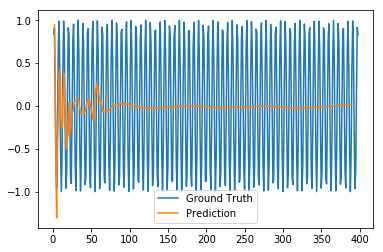

In [12]:
plt.plot(testx.reshape(testx.shape[0],2)[:,0:1], testx.reshape(testx.shape[0],2)[:,1:2], label='Ground Truth')
plt.plot(predict[:,0:1], predict[:,1:2], label='Prediction')
plt.legend()